#EXPLANATORY DATA ANALYSIS 

In [141]:
#Import the data

import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest
from scipy.stats import chi2_contingency

file_path=r"C:\Users\PC\Downloads\Loan_Project\Bank_Personal_Loan_Modelling.xlsx"
sheet_name="Data"
df=pd.read_excel(file_path,sheet_name="Data")
#print(df)



#Data Understanding

In [142]:
#Check the unique columns and the number of unique columns 
df.columns.unique()
number_columns=df.columns.nunique()
print(f"the number of columns is {number_columns}")

the number of columns is 14


In [143]:
#Check the shape of our data set.
row,col=df.shape
print(f"there are {row} rows and {col} columns")

there are 5000 rows and 14 columns


In [144]:
#Check the datatype
df.dtypes


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [145]:
#Convert columns to the correct data type
df[["Family","Education","ZIP Code","Personal Loan","Securities Account","CD Account","Online","CreditCard"]]=df[["Family","Education","ZIP Code","Personal Loan","Securities Account","CD Account","Online","CreditCard"]].astype(str)


In [146]:
#Change the negative values for the variable experience by using absolute value.
df["Experience"]=df["Experience"].abs()

In [147]:
#Check the sum of null values in our datasets
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [148]:
#Describe the numerical data 
df.describe()

,ID,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,1.937913,56.498800
std,1443.520003,11.463166,11.415189,46.033729,1.747666,101.713802
min,1.000000,23.000000,0.000000,8.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,10.000000,635.000000


In [149]:
#Describe the categorical variables 
df.describe(include="object")


,ZIP Code,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000,5000,5000
unique,467,4,3,2,2,2,2,2
top,94720,1,1,0,0,0,1,0
freq,169,1472,2096,4520,4478,4698,2984,3530


In [150]:
#Check for unique columns in our data
df.columns.unique()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

#Univariate Analysis 

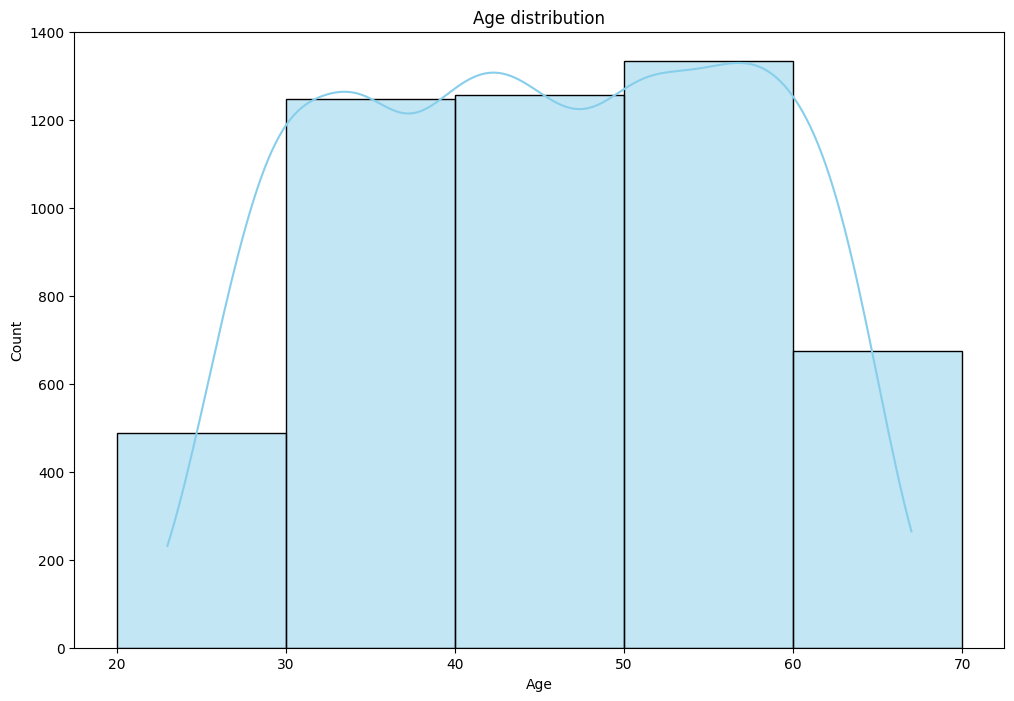

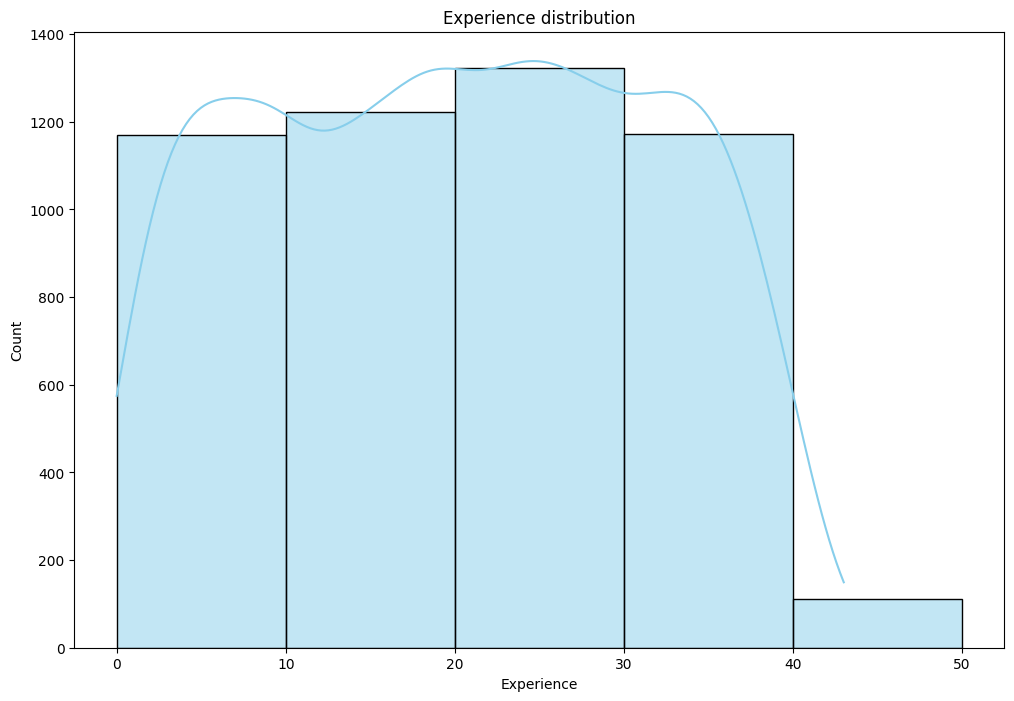

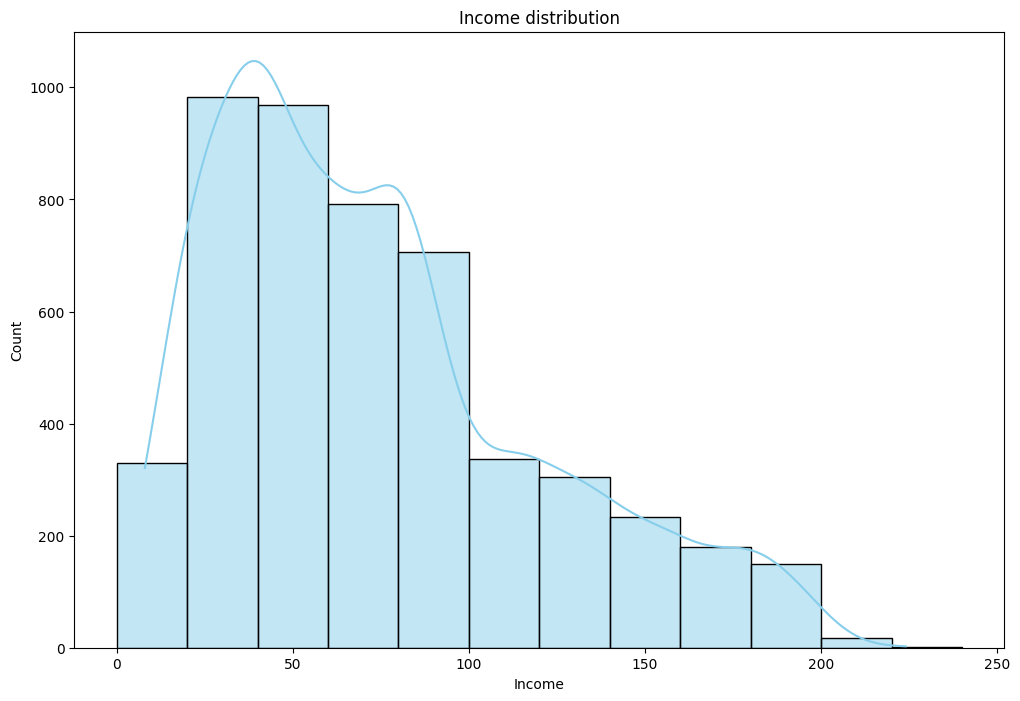

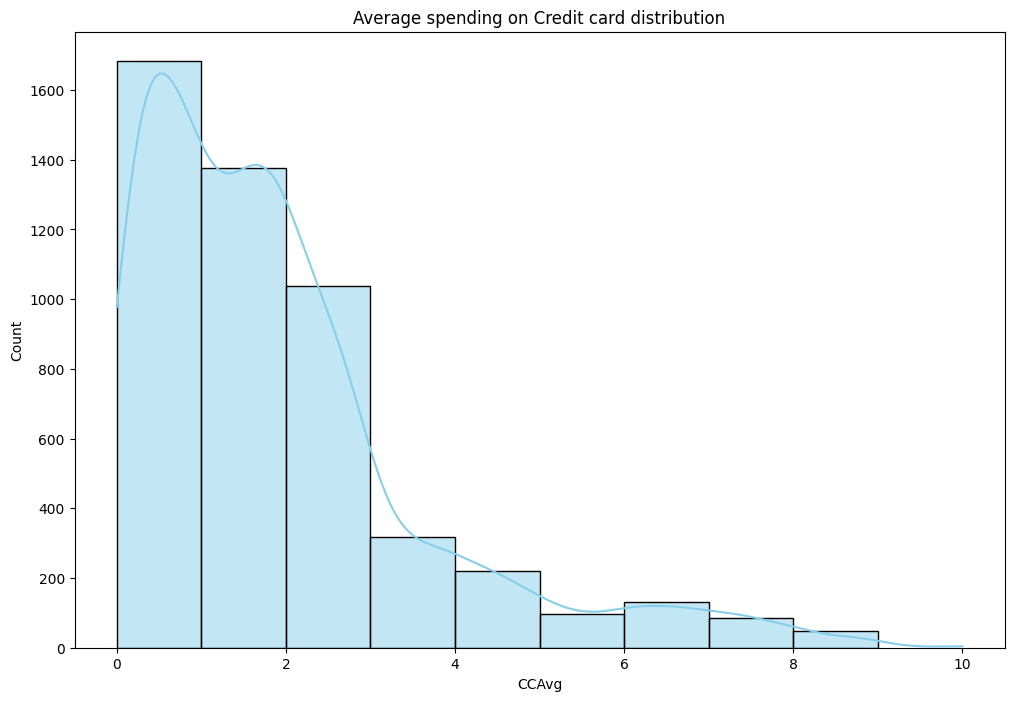

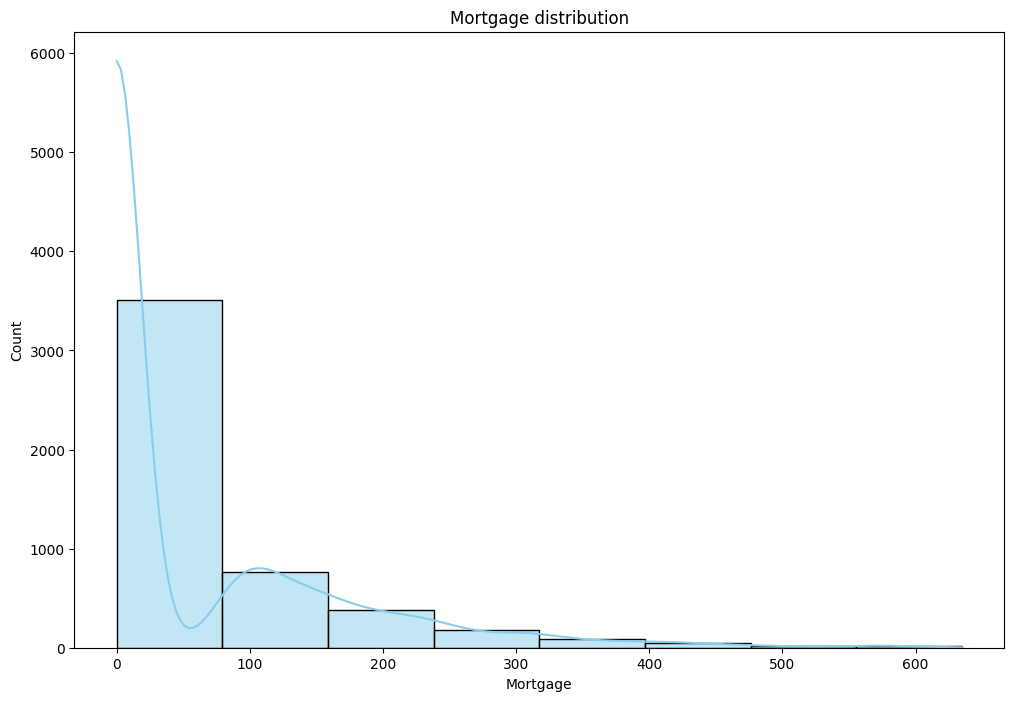

In [151]:
#Plotting the distibution of the numerical variables 

plt.figure(figsize=(12,8))
sns.histplot(data=df,x="Age",bins=[20,30,40,50,60,70],kde=True,color="skyblue")
plt.title("Age distribution")
plt.show()

plt.figure(figsize=(12,8))
sns.histplot(data=df,x="Experience",bins=[0,10,20,30,40,50],kde=True,color="skyblue")
plt.title("Experience distribution")
plt.show()

plt.figure(figsize=(12,8))
sns.histplot(data=df,x="Income",kde=True,bins=[0,20,40,60,80,100,120,140,160,180,200,220,240],color="skyblue")
plt.title("Income distribution")
plt.show()


plt.figure(figsize=(12,8))
sns.histplot(data=df,x="CCAvg",kde=True,bins=[0,1,2,3,4,5,6,7,8,9],color="skyblue")
plt.title("Average spending on Credit card distribution")
plt.show()



plt.figure(figsize=(12,8))
sns.histplot(data=df,x="Mortgage",color="skyblue",bins=8,kde=True)
plt.title("Mortgage distribution")
plt.show()

#Based on our plots, we can infer that the distribution of our numerical variables deviates from normality.


In [152]:
# We use various normality test to confirm the above results
Experience=df["Experience"]
Age=df["Age"]
Mortgage=df["Mortgage"]
Income=df["Income"]
CCAvg=df["CCAvg"]


#Setting up alpha
alpha = 0.05

#Normality test 
shapiro_test = stats.shapiro(Experience)
ks_test = stats.kstest(Experience, 'norm')
ad_test = stats.anderson(Experience, dist='norm')
dagostino_test = stats.normaltest(Experience)
lilliefors_test = lilliefors(Experience, dist='norm')

#Create a table to insert our values using pandas 
test_results = pd.DataFrame({
    'Type of test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'T-statistic': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-value': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normality': ['Yes' if shapiro_test[1] > alpha else 'No',
                  'Yes' if ks_test.pvalue > alpha else 'No',
                  'Yes' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'No',
                  'Yes' if dagostino_test.pvalue > alpha else 'No',
                  'Yes' if lilliefors_test[1] > alpha else 'No']
})

print(test_results)

         Type of test  T-statistic       p-value Normality
0        Shapiro-Wilk     0.961356  1.479298e-34        No
1  Kolmogorov-Smirnov     0.944050  0.000000e+00        No
2    Anderson-Darling    48.557190           NaN        No
3  D'Agostino-Pearson  2731.021827  0.000000e+00        No
4          Lilliefors     0.070480  1.000000e-03        No


In [153]:
#Normality test 
shapiro_test = stats.shapiro(Mortgage)
ks_test = stats.kstest(Mortgage, 'norm')
ad_test = stats.anderson(Mortgage,dist='norm')
dagostino_test = stats.normaltest(Mortgage)
lilliefors_test = lilliefors(Mortgage, dist='norm')

#Create a table to insert our values using pandas 
test_results = pd.DataFrame({
    'Type of test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'T-statistic': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-value': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normality': ['Yes' if shapiro_test[1] > alpha else 'No',
                  'Yes' if ks_test.pvalue > alpha else 'No',
                  'Yes' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'No',
                  'Yes' if dagostino_test.pvalue > alpha else 'No',
                  'Yes' if lilliefors_test[1] > alpha else 'No']
})

print(test_results)

         Type of test  T-statistic       p-value Normality
0        Shapiro-Wilk     0.628195  7.107316e-74        No
1  Kolmogorov-Smirnov     0.500000  0.000000e+00        No
2    Anderson-Darling   776.176460           NaN        No
3  D'Agostino-Pearson  2100.083145  0.000000e+00        No
4          Lilliefors     0.403113  1.000000e-03        No


In [154]:
#Normality test 
shapiro_test = stats.shapiro(Age)
ks_test = stats.kstest(Age, 'norm')
ad_test = stats.anderson(Age, dist='norm')
dagostino_test = stats.normaltest(Age)
lilliefors_test = lilliefors(Age, dist='norm')

#Create a table to insert our values using pandas 
test_results = pd.DataFrame({
    'Type of test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'T-statistic': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-value': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normality': ['Yes' if shapiro_test[1] > alpha else 'No',
                  'Yes' if ks_test.pvalue > alpha else 'No',
                  'Yes' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'No',
                  'Yes' if dagostino_test.pvalue > alpha else 'No',
                  'Yes' if lilliefors_test[1] > alpha else 'No']
})

print(test_results)

         Type of test  T-statistic       p-value Normality
0        Shapiro-Wilk     0.961863  2.262675e-34        No
1  Kolmogorov-Smirnov     1.000000  0.000000e+00        No
2    Anderson-Darling    50.636740           NaN        No
3  D'Agostino-Pearson  2908.928677  0.000000e+00        No
4          Lilliefors     0.071856  1.000000e-03        No


In [155]:
#Normality test 
shapiro_test = stats.shapiro(CCAvg)
ks_test = stats.kstest(CCAvg, 'norm')
ad_test = stats.anderson(CCAvg, dist='norm')
dagostino_test = stats.normaltest(CCAvg)
lilliefors_test = lilliefors(CCAvg, dist='norm')

#Create a table to insert our values using pandas 
test_results = pd.DataFrame({
    'Type of test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'T-statistic': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-value': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normality': ['Yes' if shapiro_test[1] > alpha else 'No',
                  'Yes' if ks_test.pvalue > alpha else 'No',
                  'Yes' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'No',
                  'Yes' if dagostino_test.pvalue > alpha else 'No',
                  'Yes' if lilliefors_test[1] > alpha else 'No']
})

print(test_results)

         Type of test  T-statistic       p-value Normality
0        Shapiro-Wilk     0.847255  1.322794e-56        No
1  Kolmogorov-Smirnov     0.521460  0.000000e+00        No
2    Anderson-Darling   203.057206           NaN        No
3  D'Agostino-Pearson  1447.552135  0.000000e+00        No
4          Lilliefors     0.135797  1.000000e-03        No


In [156]:
#Normality test 
shapiro_test = stats.shapiro(Income)
ks_test = stats.kstest(Income, 'norm')
ad_test = stats.anderson(Income, dist='norm')
dagostino_test = stats.normaltest(Income)
lilliefors_test = lilliefors(Income, dist='norm')

#Create a table to insert our values using pandas 
test_results = pd.DataFrame({
    'Type of test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'T-statistic': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-value': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normality': ['Yes' if shapiro_test[1] > alpha else 'No',
                  'Yes' if ks_test.pvalue > alpha else 'No',
                  'Yes' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'No',
                  'Yes' if dagostino_test.pvalue > alpha else 'No',
                  'Yes' if lilliefors_test[1] > alpha else 'No']
})

print(test_results)

         Type of test  T-statistic       p-value Normality
0        Shapiro-Wilk     0.928240  8.631808e-44        No
1  Kolmogorov-Smirnov     1.000000  0.000000e+00        No
2    Anderson-Darling   105.872719           NaN        No
3  D'Agostino-Pearson   454.668605  1.861945e-99        No
4          Lilliefors     0.098470  1.000000e-03        No


In [157]:
#Classifying the variables into the category and numerical group 
categorical_variables=[ col for col in df.columns if df[col].nunique()<=5]
print(categorical_variables)

numerical_variables=[col for col in df.columns if df[col].nunique()>=5 ]
print(numerical_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


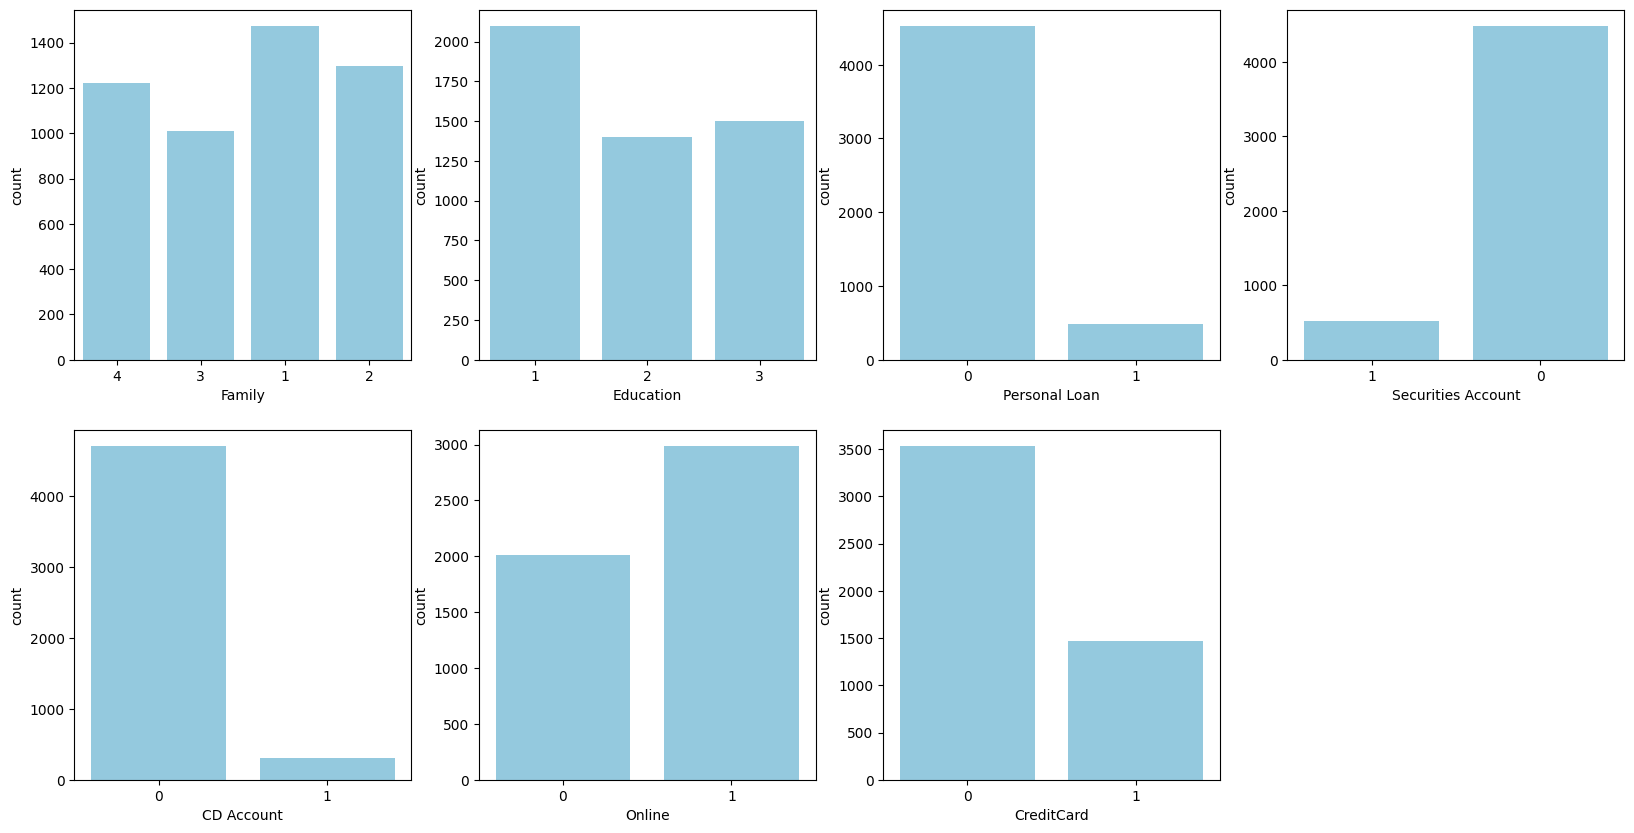

In [158]:
#Plotting Countplots to Visualize the Frequency of Categorical Variables
fig=plt.figure(figsize=(20,10))

for i,col in enumerate(categorical_variables):

    ax=fig.add_subplot(2,4,i+1)

    sns.countplot(data=df,x=col, color = "skyblue")
    
#Single individuals constitute the largest group in the dataset.
#The dataset has a higher proportion of undergraduate individuals.
#A small percentage of people have a personal loan, securities account, CD account, or credit card.
#The majority of individuals in the dataset use online banking.


C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_num

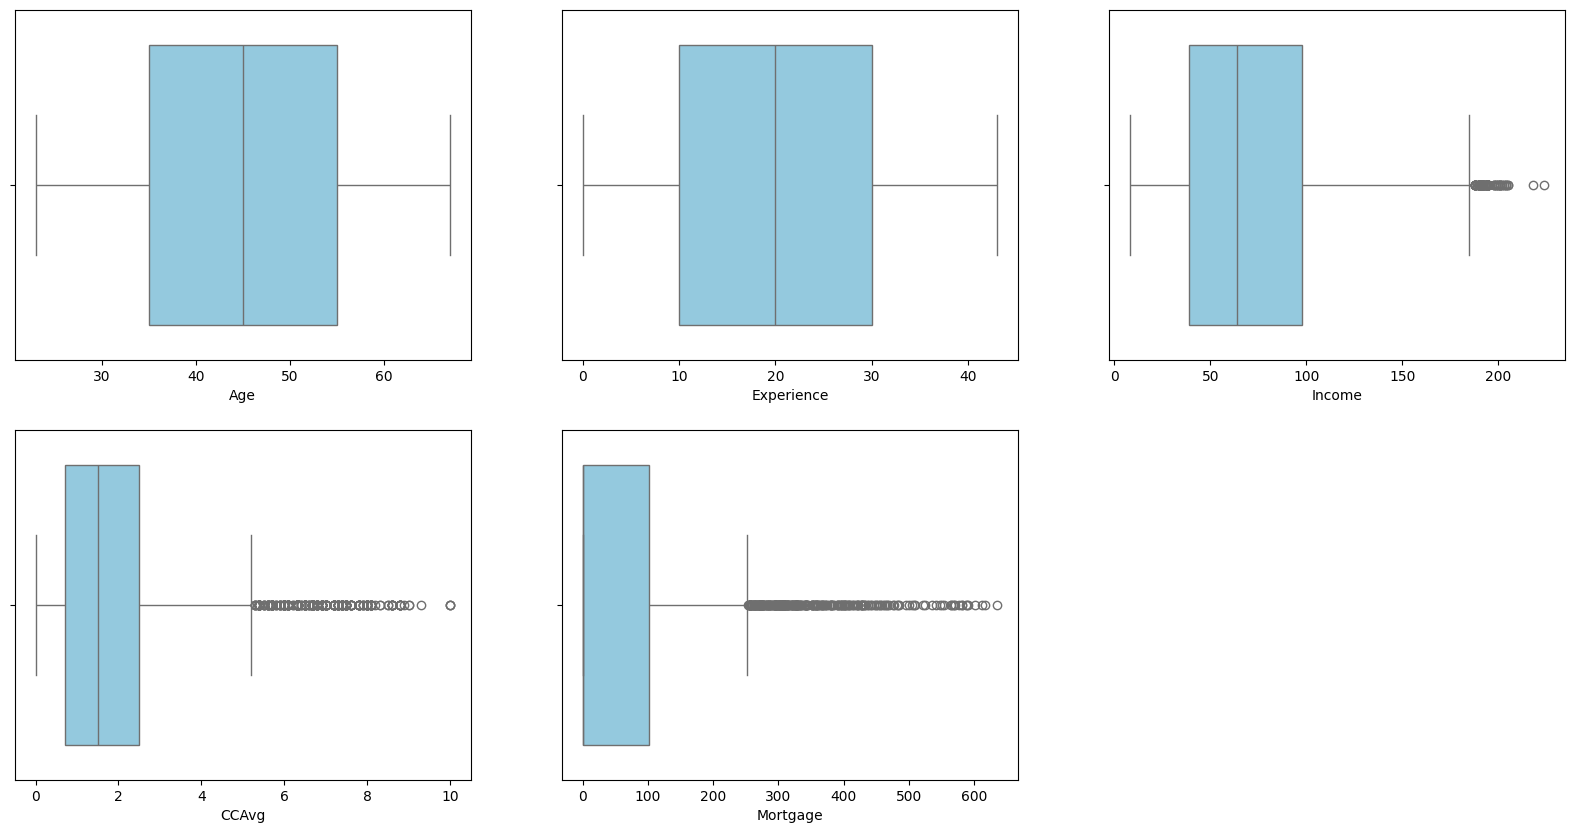

In [159]:
#Plotting Boxplots to Visualize the Distribution of Numerical Variables and also detect outliers.
df_numerical=df[numerical_variables]
df_numerical_values=df_numerical.drop(columns=["ID","ZIP Code"])
numerical_values=[ col for col in df_numerical_values if df_numerical_values[col].nunique()>=5]

fig1=plt.figure(figsize=(20,10))
for i,col in enumerate(numerical_values):
    ax=fig1.add_subplot(2,3,i+1)
    sns.boxplot(data=df_numerical_values,color="skyblue",x=col)
    
# We detect outliers for the variables CCAvg,Mortgage, and Education

In [160]:
#Detect ouliers using z-score for the variables "Mortgage","Income","CCAvg".

def detect_outliers_zscore(df, column, threshold=2):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[np.abs(z_scores) > threshold]


Outliers_Mortgage = detect_outliers_zscore(df, 'Mortgage')
Outliers_Income = detect_outliers_zscore(df, 'Income')
Outliers_CCAvg = detect_outliers_zscore(df, 'CCAvg')


# Display outliers
print("Outliers for the variable Mortgage:")
print(Outliers_Mortgage)


Outliers for the variable Mortgage:
        ID  Age  Experience  Income ZIP Code Family  CCAvg Education  \
22      23   29           5      62    90277      1    1.2         1   
39      40   38          13      80    94115      4    0.7         3   
42      43   32           7     132    90019      4    1.1         2   
59      60   31           5     188    91320      2    4.5         1   
66      67   62          36     105    95670      2    2.8         1   
...    ...  ...         ...     ...      ...    ...    ...       ...   
4859  4860   34           8     165    91107      1    7.0         3   
4865  4866   50          24     133    90025      4    1.4         2   
4899  4900   54          29      85    94928      4    1.3         3   
4942  4943   52          26     109    94710      1    2.4         1   
4963  4964   32           6      98    95054      2    4.5         3   

      Mortgage Personal Loan Securities Account CD Account Online CreditCard  
22         260      

In [161]:
print("Outliers for the variable Income:")
print(Outliers_Income)


Outliers for the variable Income:
        ID  Age  Experience  Income ZIP Code Family     CCAvg Education  \
9       10   34           9     180    93023      1  8.900000         3   
18      19   46          21     193    91604      2  8.100000         3   
47      48   37          12     194    91380      4  0.200000         3   
53      54   50          26     190    90245      3  2.100000         3   
59      60   31           5     188    91320      2  4.500000         1   
...    ...  ...         ...     ...      ...    ...       ...       ...   
4837  4838   36          10     183    95348      2  0.000000         1   
4842  4843   49          23     174    95449      3  4.600000         2   
4895  4896   45          20     201    92120      2  2.800000         1   
4981  4982   34           9     195    90266      2  3.000000         1   
4993  4994   45          21     218    91801      2  6.666667         1   

      Mortgage Personal Loan Securities Account CD Account Online

In [162]:
print("Outliers for the variable CCAvg:")
print(Outliers_CCAvg)

Outliers for the variable CCAvg:
        ID  Age  Experience  Income ZIP Code Family     CCAvg Education  \
9       10   34           9     180    93023      1  8.900000         3   
18      19   46          21     193    91604      2  8.100000         3   
44      45   46          20     104    94065      1  5.700000         1   
55      56   41          17     139    94022      2  8.000000         1   
61      62   47          21     125    93407      1  5.700000         1   
...    ...  ...         ...     ...      ...    ...       ...       ...   
4873  4874   59          35     165    94309      2  6.000000         1   
4908  4909   40          16     138    92121      2  6.100000         1   
4911  4912   46          22     153    94539      2  7.500000         1   
4937  4938   33           8     162    94960      1  8.600000         1   
4993  4994   45          21     218    91801      2  6.666667         1   

      Mortgage Personal Loan Securities Account CD Account Online 

In [163]:
#Detect outliers using IsolationForest

isolation_forest=IsolationForest(contamination=0.1,random_state=42)
outliers=isolation_forest.fit_predict(df)
df["outlier"]=outliers

outliers=df[df["outlier"]==-1]
print("outliers dectected:")
print(outliers)

#From the isolationForest test, we conclude that outliers represent 5% of our Data 

outliers dectected:
        ID  Age  Experience  Income ZIP Code Family  CCAvg Education  \
0        1   25           1      49    91107      4    1.6         1   
9       10   34           9     180    93023      1    8.9         3   
14      15   67          41     112    91741      1    2.0         1   
16      17   38          14     130    95010      4    4.7         3   
18      19   46          21     193    91604      2    8.1         3   
...    ...  ...         ...     ...      ...    ...    ...       ...   
4937  4938   33           8     162    94960      1    8.6         1   
4942  4943   52          26     109    94710      1    2.4         1   
4956  4957   39          13      59    94109      4    0.2         3   
4962  4963   46          20     122    90065      3    3.0         3   
4980  4981   29           5     135    95762      3    5.3         1   

      Mortgage Personal Loan Securities Account CD Account Online CreditCard  \
0            0             0       

#Bivariate Analysis 

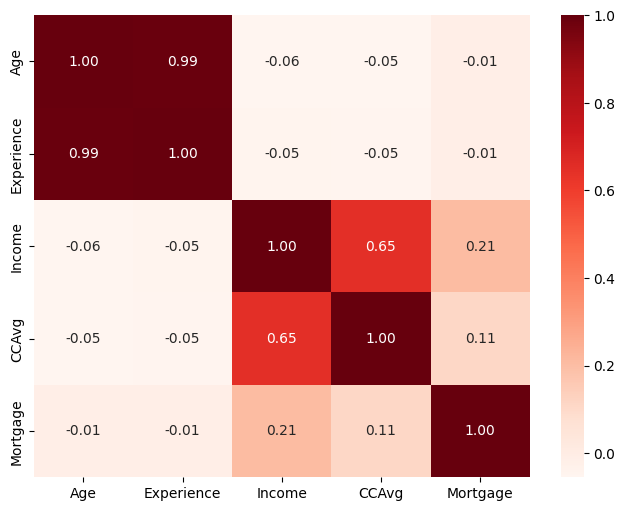

<Axes: >

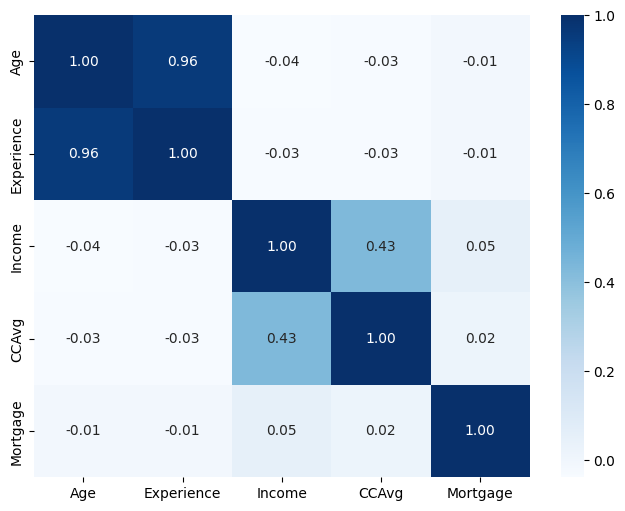

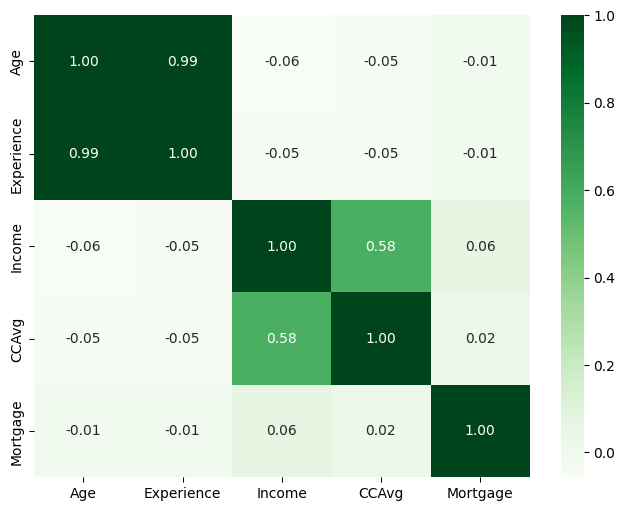

In [164]:
#Check the correlation between numerical variables 

corr=df_numerical_values.corr(method="pearson")
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap="Reds",cbar=True,fmt=".2f")
plt.show()

corr1=df_numerical_values.corr(method= "kendall")
plt.figure(figsize=(8,6))
sns.heatmap(corr1,cmap="Blues",annot=True,cbar=True,fmt=".2f")

corr2=df_numerical_values.corr(method= "spearman")
plt.figure(figsize=(8,6))
sns.heatmap(corr2,cmap="Greens",annot=True,cbar=True,fmt=".2f")

#There is a strong correlation between Age and Experience.
#Additionally, a relationship can be observed between Income and the average spending on credit cards.

<Figure size 800x600 with 0 Axes>

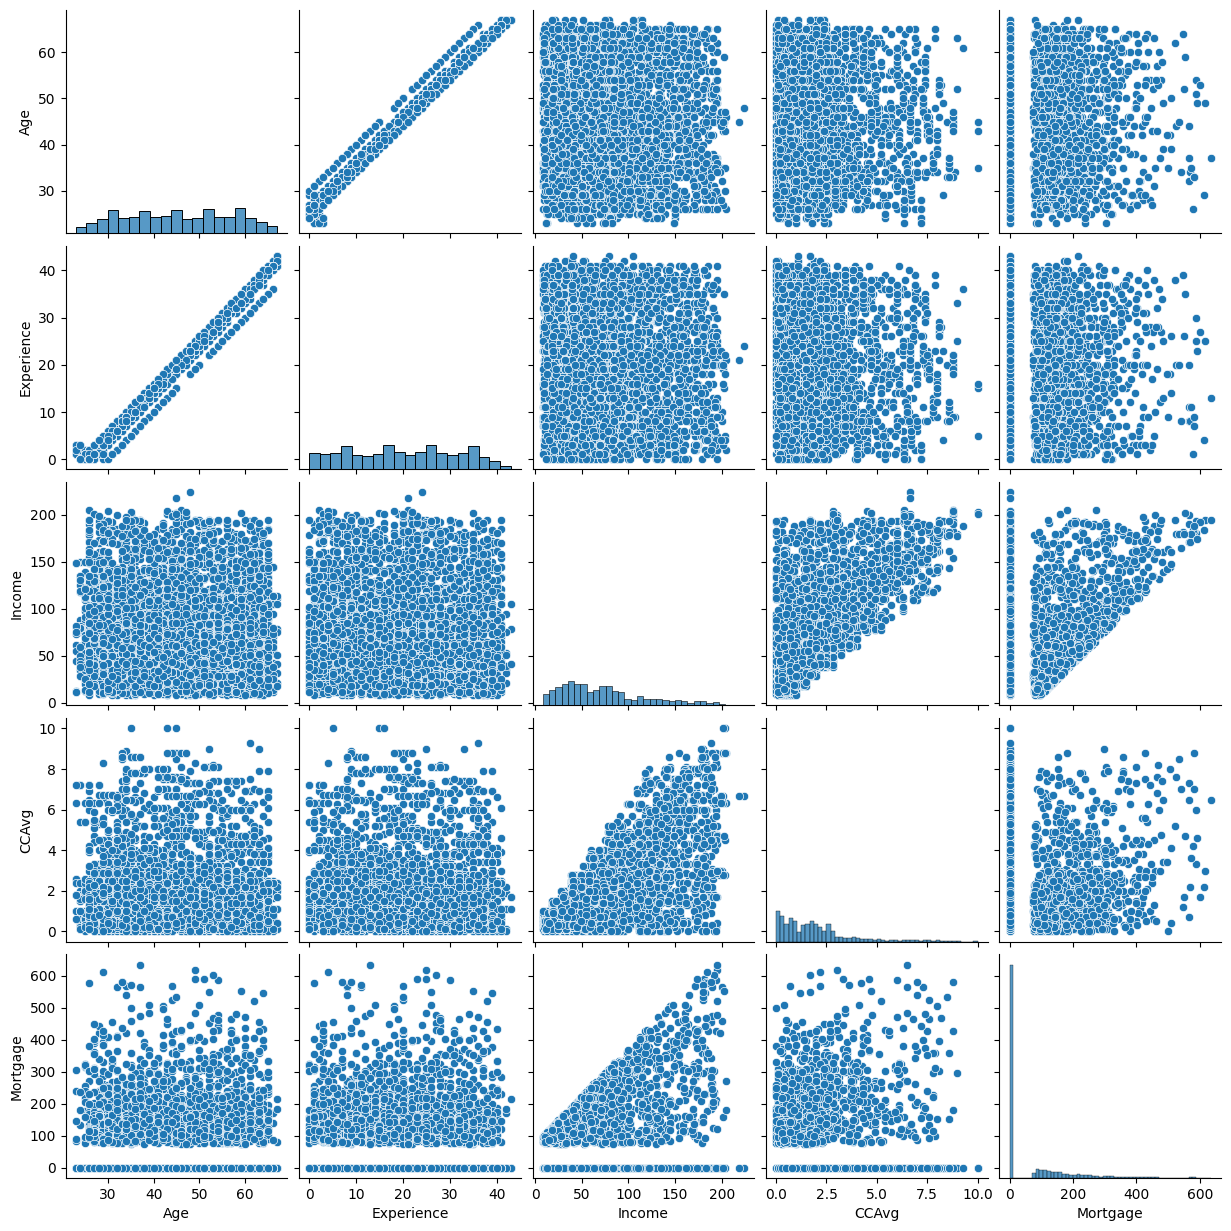

In [165]:
#Pairplot displaying the relationship between numerical variables 
plt.figure(figsize=(8,6))
sns.pairplot(data=df_numerical_values,kind="scatter")
plt.show()
#As mentioned above, it is confirmed that with an increase in age, there is a corresponding growth in experience.

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


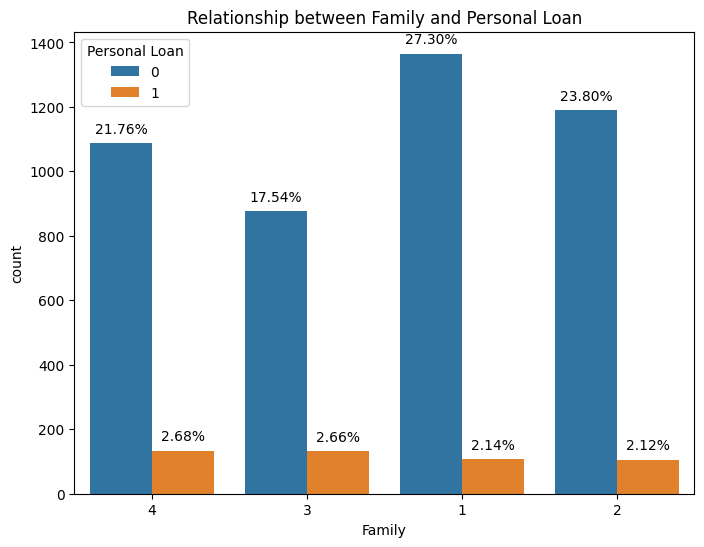

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


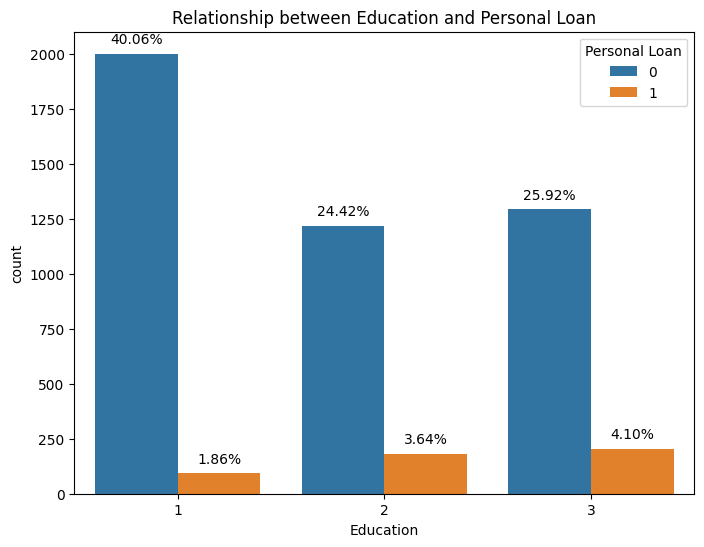

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


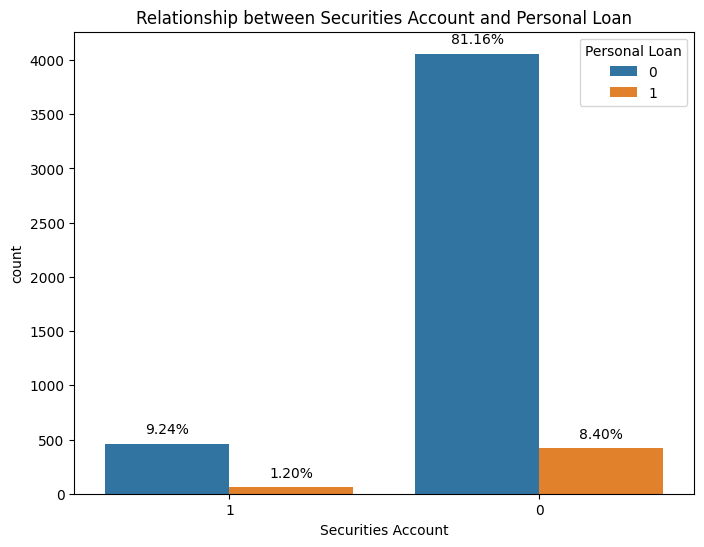

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


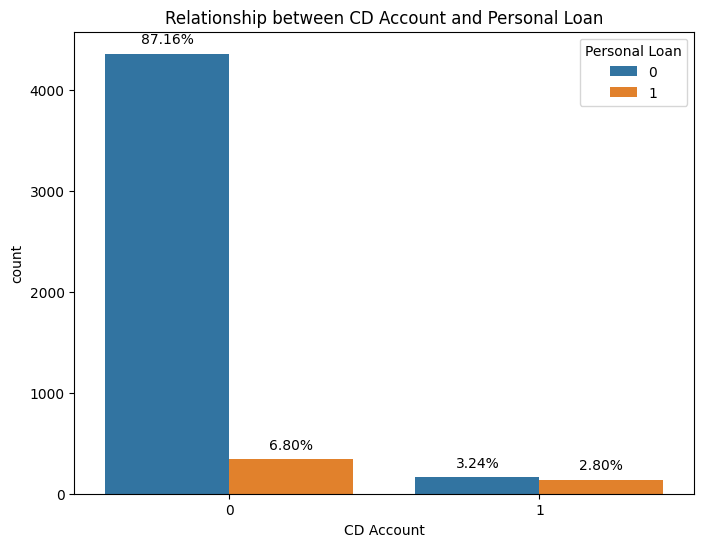

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


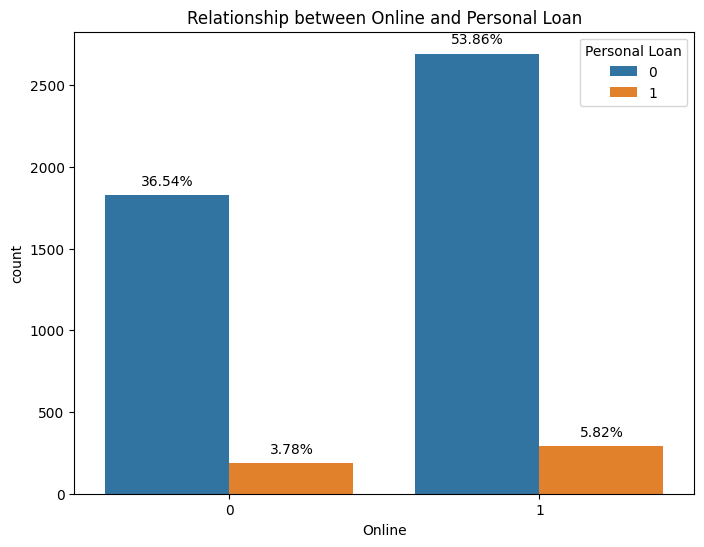

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


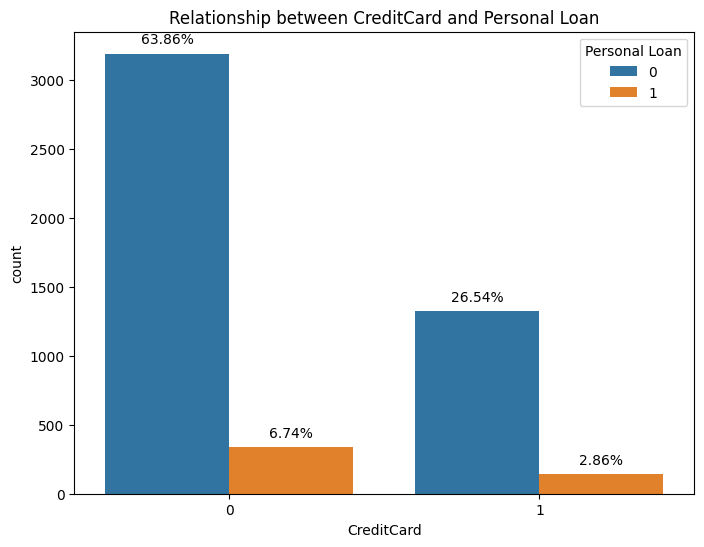

In [166]:
#Countplots Showing the Relationship Between Categorical Variables.

categorical_columns=["Family","Education",'Securities Account','CD Account','Online','CreditCard']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df, x=col, hue='Personal Loan')

    # Calculate total count
    total_count = len(df)

    # Loop through each bar and add the percentage
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Avoid 0% annotations
            width = p.get_width()
            x = p.get_x() + width / 2
            y = height

            # Calculate percentage
            percentage = (height / total_count) * 100

            # Annotate only if percentage is greater than 0
            ax.annotate(f'{percentage:.2f}%', 
                        (x, y), 
                        ha='center', va='center', 
                        xytext=(0, 10), textcoords='offset points')

    # Set title dynamically
    plt.title(f'Relationship between {col} and Personal Loan')
    plt.show()
    
    #Families with only two members are less likely to take personal credit, while families 
    # with four members have the highest credit uptake.

    #Individuals living alone are more likely not to take personal credit.

    #Advanced professionals are more likely to take personal credit compared to other categories,
    #whereas undergraduates are the least likely to do so.




In [167]:
#Verify the relationship between the categorical variables using contigency table and chi2 test

#Check the relationship between Online banking use and Personal loan
contingency_table=pd.crosstab(df["Online"],df["Personal Loan"])
print(contingency_table)

#Finding the chi2
chi2_stat,p_value,dof,expected_freq=chi2_contingency(contingency_table)
print("chi2_stat:",chi2_stat)
print("P_value:",p_value)
print("Degree of freedom:",dof)
print("Expected frequency:\n",expected_freq)

#Since the p-value is greater that 0.05, we fail to reject the null hypothesis. Therefore, there is no
#significant relationship between online banking and personal loan  

Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
chi2_stat: 0.15600672120524922
P_value: 0.6928599643141484
Degree of freedom: 1
Expected frequency:
 [[1822.464  193.536]
 [2697.536  286.464]]


In [168]:
#Check the relationship between Credit Card  use and Personal loan
contingency_table=pd.crosstab(df["CreditCard"],df["Personal Loan"])
print(contingency_table)

#Finding the chi2
chi2_stat,p_value,dof,expected_freq=chi2_contingency(contingency_table)
print("chi2_stat:",chi2_stat)
print("P_value:",p_value)
print("Degree of freedom:",dof)
print("Expected frequency:\n",expected_freq)

#There is no significant relationship between Credit card use and Personal loan

Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143
chi2_stat: 0.021144453920855056
P_value: 0.8843861223314505
Degree of freedom: 1
Expected frequency:
 [[3191.12  338.88]
 [1328.88  141.12]]


In [169]:
#Check the relationship between CD Account  use and Personal loan
contingency_table=pd.crosstab(df["CD Account"],df["Personal Loan"])
print(contingency_table)

#Finding the chi2
chi2_stat,p_value,dof,expected_freq=chi2_contingency(contingency_table)
print("chi2_stat:",chi2_stat)
print("P_value:",p_value)
print("Degree of freedom:",dof)
print("Expected frequency:\n",expected_freq)

#The p-value suggests a relationship between the CD Account and the Personal Loan


Personal Loan     0    1
CD Account              
0              4358  340
1               162  140
chi2_stat: 495.90424218782334
P_value: 7.398297503329848e-110
Degree of freedom: 1
Expected frequency:
 [[4246.992  451.008]
 [ 273.008   28.992]]


In [170]:
#Check the relationship between Education and Personal loan
contingency_table=pd.crosstab(df["Education"],df["Personal Loan"])
print(contingency_table)

#Finding the chi2
chi2_stat,p_value,dof,expected_freq=chi2_contingency(contingency_table)
print("chi2_stat:",chi2_stat)
print("P_value:",p_value)
print("Degree of freedom:",dof)
print("Expected frequency:\n",expected_freq)

#the p_value suggests that there is a significant  relationship between Education and Personal Loan


Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
chi2_stat: 111.2398718738913
P_value: 6.991473868665428e-25
Degree of freedom: 2
Expected frequency:
 [[1894.784  201.216]
 [1268.312  134.688]
 [1356.904  144.096]]


C:\Users\PC\AppData\Local\Temp\ipykernel_23604\4090183929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Personal Loan",y='Income',palette=["lightgreen", "coral"])
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWar

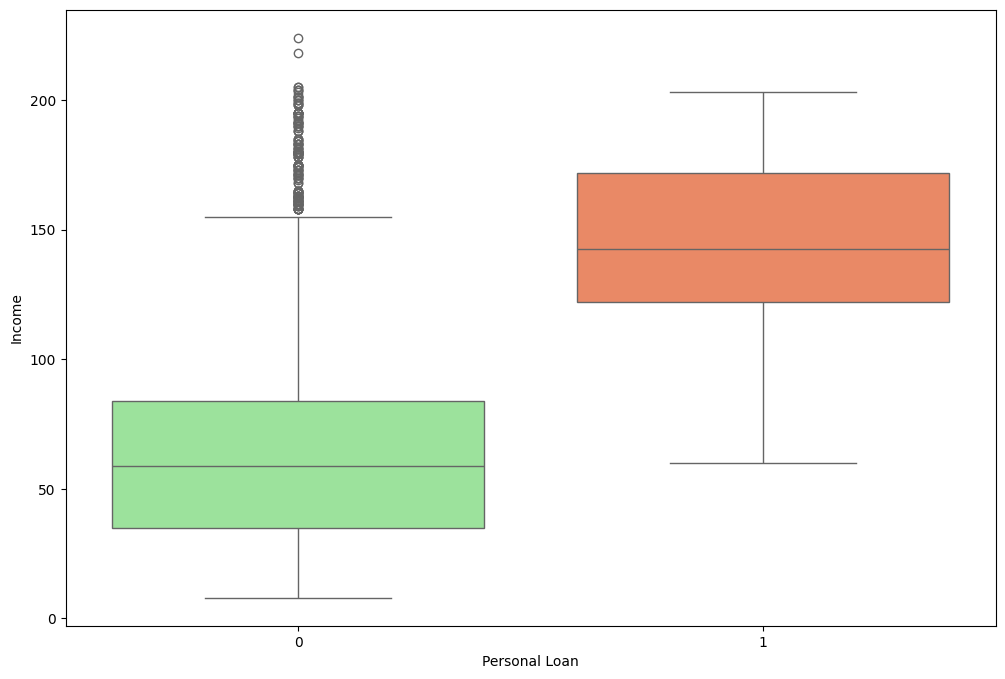

C:\Users\PC\AppData\Local\Temp\ipykernel_23604\4090183929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Personal Loan",y='Mortgage',palette=["lightgreen", "coral"])
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureW

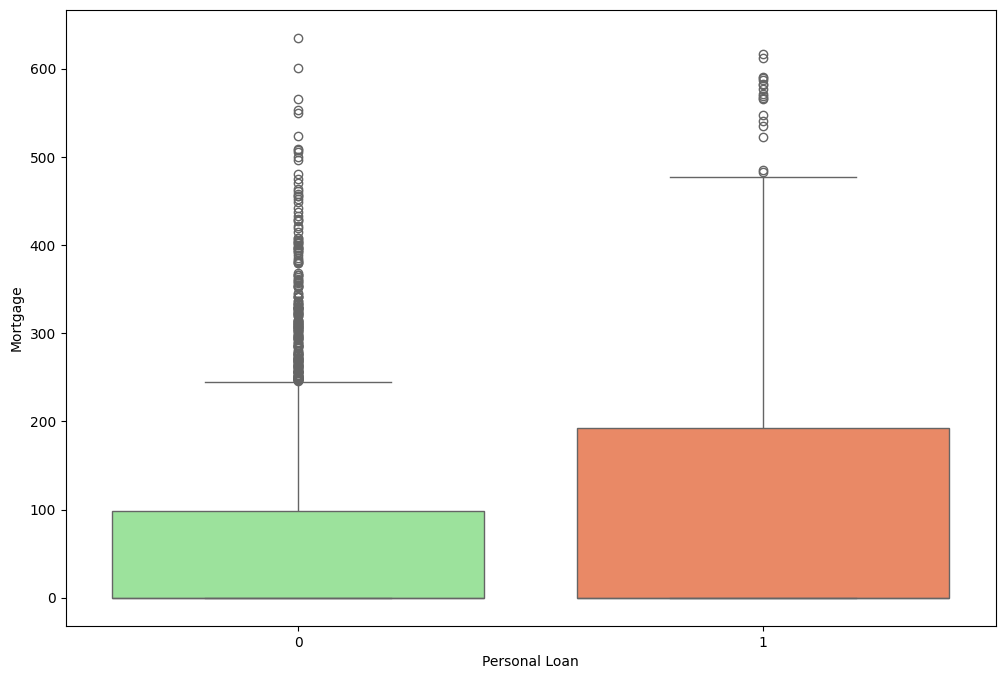

C:\Users\PC\AppData\Local\Temp\ipykernel_23604\4090183929.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Personal Loan",y='Age',palette=["lightgreen", "coral"])
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarni

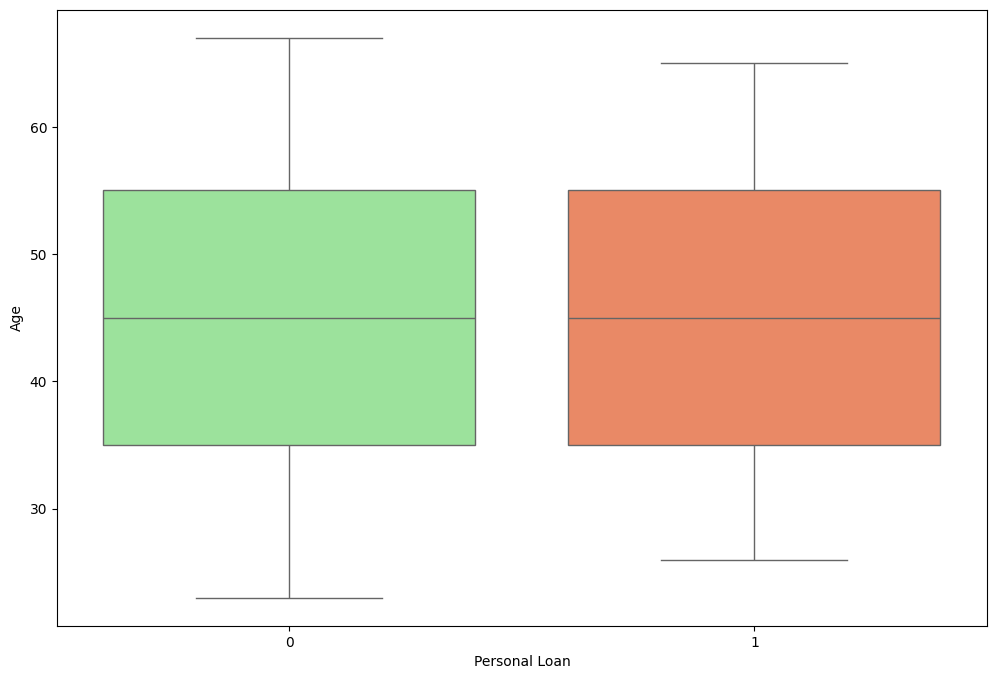

C:\Users\PC\AppData\Local\Temp\ipykernel_23604\4090183929.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Personal Loan",y='Experience',palette=["lightgreen", "coral"])
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: Futu

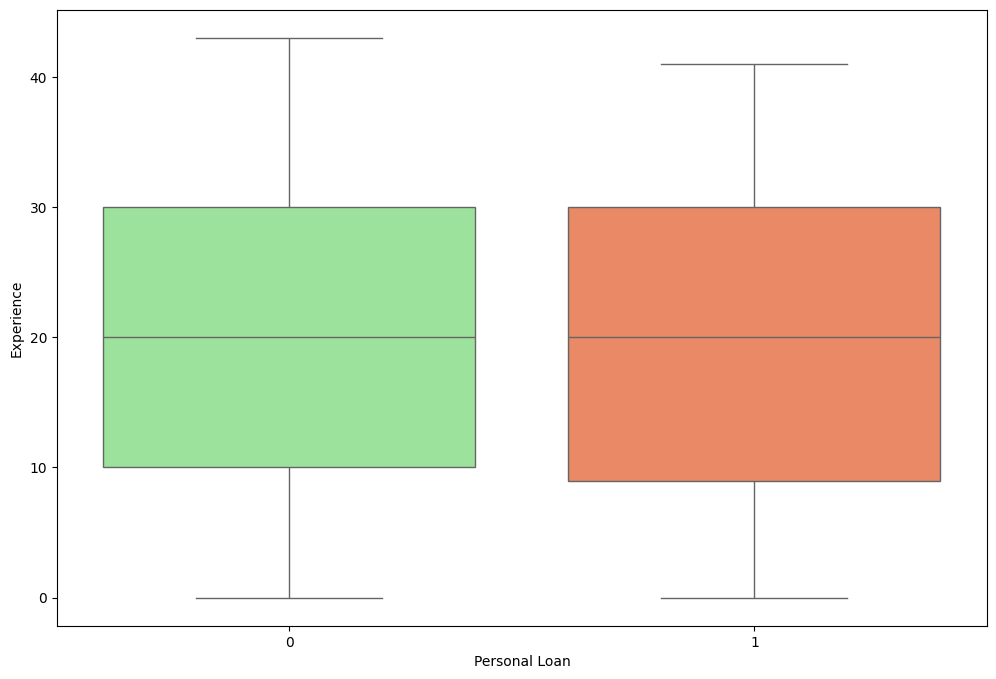

C:\Users\PC\AppData\Local\Temp\ipykernel_23604\4090183929.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Personal Loan",y='CCAvg',palette=["lightgreen", "coral"])
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWar

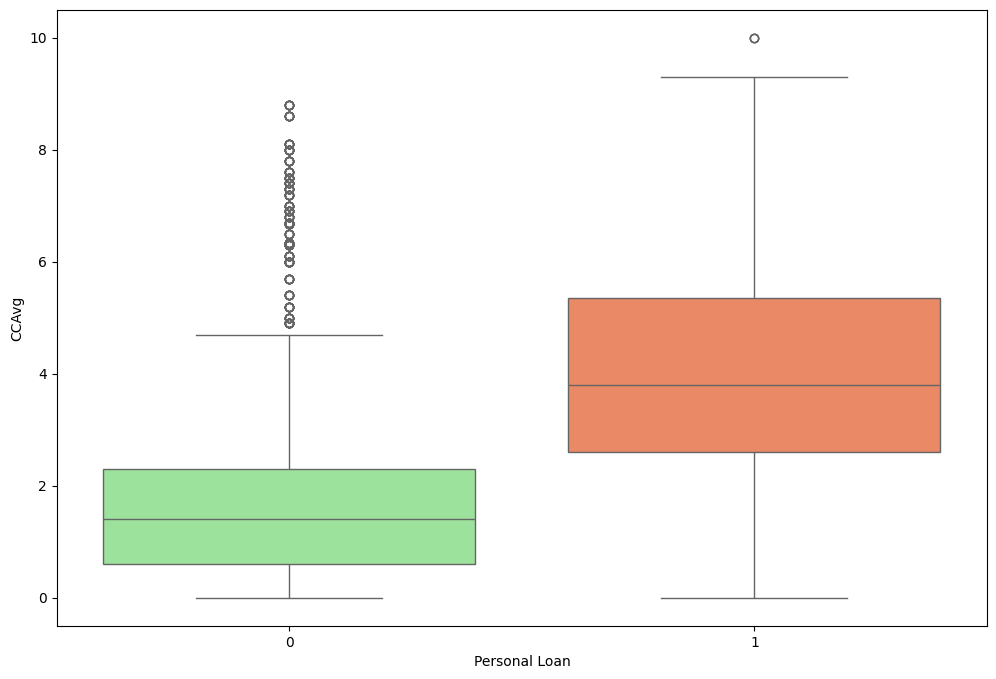

In [171]:
#Box plot showing the relationship between numerical and categorical variables .
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="Personal Loan",y='Income',palette=["lightgreen", "coral"])
plt.show("Income vs Personal Loan")

plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="Personal Loan",y='Mortgage',palette=["lightgreen", "coral"])
plt.show("Mortgage vs Personal Loan")

plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="Personal Loan",y='Age',palette=["lightgreen", "coral"])
plt.show("Age vs Personal Loan")

plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="Personal Loan",y='Experience',palette=["lightgreen", "coral"])
plt.show("Experience vs Personal Loan")

plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="Personal Loan",y='CCAvg',palette=["lightgreen", "coral"])
plt.show("CCAvg vs Personal Loan")


#We observed a higher number of outliers in the Income, Mortgage, and CCAvg variables for individuals 
# who do not take a personal loan, compared to those who do.




In [172]:
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'outlier'],
      dtype='object')


In [173]:
print(df.head(10))

   ID  Age  Experience  Income ZIP Code Family  CCAvg Education  Mortgage  \
0   1   25           1      49    91107      4    1.6         1         0   
1   2   45          19      34    90089      3    1.5         1         0   
2   3   39          15      11    94720      1    1.0         1         0   
3   4   35           9     100    94112      1    2.7         2         0   
4   5   35           8      45    91330      4    1.0         2         0   
5   6   37          13      29    92121      4    0.4         2       155   
6   7   53          27      72    91711      2    1.5         2         0   
7   8   50          24      22    93943      1    0.3         3         0   
8   9   35          10      81    90089      3    0.6         2       104   
9  10   34           9     180    93023      1    8.9         3         0   

  Personal Loan Securities Account CD Account Online CreditCard  outlier  
0             0                  1          0      0          0       -1  
1 

In [174]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding


In [175]:
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'outlier',
       'ZIP Code_90007', 'ZIP Code_90009', 'ZIP Code_90011',
       ...
       'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3',
       'Personal Loan_1', 'Securities Account_1', 'CD Account_1', 'Online_1',
       'CreditCard_1'],
      dtype='object', length=483)


In [176]:
print(df.head(10))

   ID  Age  Experience  Income  CCAvg  Mortgage  outlier  ZIP Code_90007  \
0   1   25           1      49    1.6         0       -1           False   
1   2   45          19      34    1.5         0        1           False   
2   3   39          15      11    1.0         0        1           False   
3   4   35           9     100    2.7         0        1           False   
4   5   35           8      45    1.0         0        1           False   
5   6   37          13      29    0.4       155        1           False   
6   7   53          27      72    1.5         0        1           False   
7   8   50          24      22    0.3         0        1           False   
8   9   35          10      81    0.6       104        1           False   
9  10   34           9     180    8.9         0       -1           False   

   ZIP Code_90009  ZIP Code_90011  ...  Family_2  Family_3  Family_4  \
0           False           False  ...     False     False      True   
1           False  

In [177]:
X = df.drop(['Personal Loan_1','ID', "outlier"], axis=1)
y = df['Personal Loan_1']

In [182]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=2000)  # Increase iterations if needed
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Model Coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Accuracy: 0.971
Confusion Matrix:
[[887   8]
 [ 21  84]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       895
        True       0.91      0.80      0.85       105

    accuracy                           0.97      1000
   macro avg       0.94      0.90      0.92      1000
weighted avg       0.97      0.97      0.97      1000

Coefficients: [[-2.54663572e-02  3.12604520e-02  5.05313224e-02  1.08027102e-01
  -1.99301002e-03 -1.65645145e+00 -3.60009289e-02 -2.87590656e-01
  -1.33546374e-02  7.20505668e-03 -3.40798469e-03 -1.72474345e-02
  -5.77014921e-01 -4.39191144e-02 -1.47352120e-01  2.85426431e-01
  -6.43898998e-02 -1.43190165e-01 -2.67578920e-02 -3.50779452e-02
  -3.02382644e-01 -1.39727638e-01  7.37187435e-01 -1.77023843e-01
  -2.33523618e-03 -4.08477428e-02 -3.36537791e-03  1.66749354e+00
   2.90574057e-03 -6.27607802e-02  6.58621092e-01  4.90122656e-02
   3.63152439e-02 -3.75642968e-01 -7.88725554e-04 -

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
pd.DataFrame(y_pred)

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


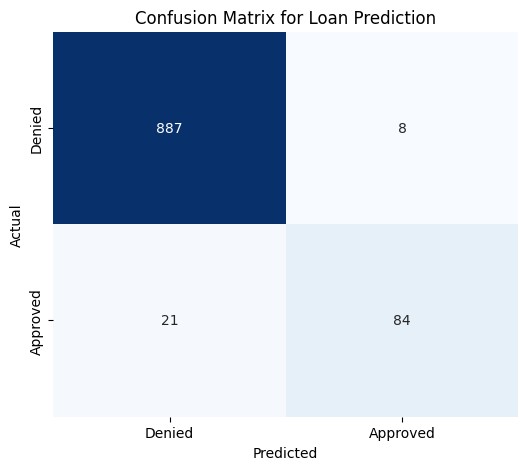

In [184]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Denied', 'Approved'], yticklabels=['Denied', 'Approved'])
plt.title('Confusion Matrix for Loan Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [180]:
# Step 1: Detect outliers using IsolationForest
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = isolation_forest.fit_predict(df)

# Step 2: Add the outlier column to your DataFrame
df["outlier"] = outliers

# Step 3: Remove the outliers (where the label is -1)
df_cleaned = df[df["outlier"] != -1].drop(columns=["outlier"])

# Step 4: Split your cleaned data into features (X) and target (y)
X = df.drop(['Personal Loan_1','ID'], axis=1)
y = df['Personal Loan_1']



# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression Model with increased max_iter
logreg= LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)  # Train on the resampled dataset


# Step 8: Predict and evaluate the model on the test set
y_pred = logreg.predict(X_test)

# Step 9: Print the classification report and confusion matrix

# Step 6: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Model Coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)



Accuracy: 0.922
Confusion Matrix:
[[838  57]
 [ 21  84]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.94      0.96       895
        True       0.60      0.80      0.68       105

    accuracy                           0.92      1000
   macro avg       0.79      0.87      0.82      1000
weighted avg       0.94      0.92      0.93      1000

Coefficients: [[-7.71008375e-02  3.46671501e-01  3.62786012e+00  6.39089723e-01
   1.01877710e-01 -1.15399653e-01 -1.77056874e-01 -2.62819097e-02
   2.28115930e-01  3.71545055e-02  6.15496939e-02 -2.13312802e-01
   2.90680142e-02 -1.54768307e-01  6.95202698e-02 -1.01719809e-01
  -7.76289075e-02 -3.38430917e-02  2.86576774e-01 -1.62423581e-01
  -1.48808434e-01  1.02663751e-01 -1.60846920e-01  1.54366673e-02
  -1.29652390e-01  2.29416902e-02  2.90596733e-01 -5.70584031e-04
  -1.36479065e-01  2.00736806e-01  3.24190575e-02  8.96852997e-02
  -2.20799291e-01  6.64251739e-03 -4.70493250e-02  